
# Project: TMDb Movie Data Analysis ( Investigate a Dataset )
<br>

#### Submitted by Afyaa Alkhamisi
<br>

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project we will analyze TMDb Movies related data. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. In particular, we will be interested in finding trends between budget and revenue Also, inspect relations between genres, release year and profit rate based on on the data from The Movies Database.

 **The questions to be answered are:**

<ul>
<li><a href="#Q1">Question 1:</a> Which are the most popular genres of movies released?</li>
<li><a href="#Q2">Question 2:</a> Which movie made the highest budget and lowest as well?</li> 
<li><a href="#Q3">Question 3:</a> Which movie made the highest revenue and lowest as well?</li>
<li><a href="#Q4">Question 4:</a> Which movie made the highest profit earned and lowest as well?</li> 
<li><a href="#Q5">Question 5:</a> Which year has the highest average profit?</li> 
</ul>

In [1]:
# import all libraries that will be used for analysis.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# magic words to set inline plotting within the document.
%matplotlib inline

In [3]:
# style
sns.set_style("darkgrid")

<a id='wrangling'></a>
## Data Wrangling

In this section, we will load in the TMDb movies data, and inspect the data. Also, check instances of missing or possibly errant data. And check for cleanliness. Then, we will trim and clean your dataset for analysis.



### General Properties

In [4]:
# load TMDb movies data
df = pd.read_csv('tmdb-movies.csv')

# print out a few lines using head() function. 
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# view dimensions of dataset.
df.shape

(10866, 21)

In [6]:
# view the general statistics about the dataset.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       


### Data Cleaning
<br>

#### Drop duplicate rows

In [8]:
# check for any duplicate rows.
df.duplicated().sum()

1

In [9]:
# drop any duplicate rows.
df.drop_duplicates(inplace = True)

In [10]:
# check if any of the number of duplicates to confirm deduplicate - should both be 0 
df.duplicated().sum()

0

#### Drop Extraneous Columns

In [11]:
# drop unused columns from the dataset.
df.drop(['id', 'imdb_id','popularity', 'homepage', 'keywords', 'overview', 'release_date','budget_adj','revenue_adj'], axis = 1, inplace = True)

In [12]:
# check changes
df.head(1)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,vote_count,vote_average,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015


#### Drop Rows with Missing Values

In [13]:
# view missing value count for each columns
df.isnull().sum()

budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
tagline                 2824
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [14]:
# drop rows with any null values in dataset
df.dropna(inplace=True)

In [15]:
# checks if any of columns in dataset have null values - should print False
df.isnull().sum().any()

False

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7635 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                7635 non-null   int64  
 1   revenue               7635 non-null   int64  
 2   original_title        7635 non-null   object 
 3   cast                  7635 non-null   object 
 4   director              7635 non-null   object 
 5   tagline               7635 non-null   object 
 6   runtime               7635 non-null   int64  
 7   genres                7635 non-null   object 
 8   production_companies  7635 non-null   object 
 9   vote_count            7635 non-null   int64  
 10  vote_average          7635 non-null   float64
 11  release_year          7635 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 775.4+ KB


#### Histograms to Check If Any Columns Contain 0's

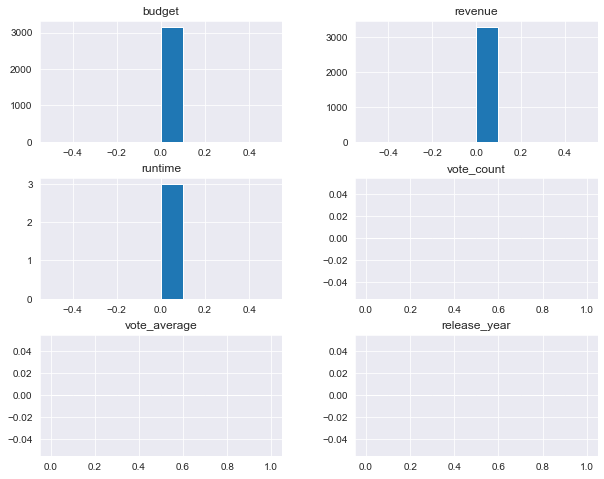

In [17]:
df [df == 0].hist(figsize=(10,8));

#### Drop Any Rows Contain 0's From The Budget, Revenue and Runtime Columns

In [18]:
# create a seperate list of budget, revenue and runtime columns
data_list = ['budget', 'revenue','runtime']

# replace all the value from '0' to NAN in the list
df[data_list] = df[data_list].replace(0, np.NAN)
# drop all the row which has NaN value in data_list 
df.dropna(subset = data_list, inplace = True)

rows, columns = df.shape
print('After dropping some entries, we now have {} number of movies.' .format(rows-1))

After dropping some entries, we now have 3543 number of movies.


#### Fix Data Types
We'll make the following changes to make the datatypes consistent and practical to work with.<br>
Fix budget and revenue datatype, convert float to int.

In [19]:
# change the data type of budget and revenue columns.
data_type = ['budget', 'revenue']
# fix the data type.
df[data_type] = df[data_type].applymap(np.int64)
# view the changed data
df.dtypes

budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
tagline                  object
runtime                 float64
genres                   object
production_companies     object
vote_count                int64
vote_average            float64
release_year              int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

In this section, after trimmed and cleaned data. We will move on to exploration. Here we will compute statistics and create visualizations with the goal of addressing the research questions that we posed in the <a href="#intro">Introduction</a> section. 

For answer question 4, we need to calculating the profit earned of the each movie. Also, inserting the result into a new column in the dataset

In [20]:
# use insert function with three parameters
# (index of the column in the dataset, name of the column, value to be inserted)
df.insert(2,'profit', df['revenue'] - df['budget'])

In [21]:
# view the changes in the dataset
df.head(3)

,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,production_companies,vote_count,vote_average,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015


<a id='Q1'></a>
### Research Question 1: Which are the most popular genres of movies released?
<br>

In [22]:
# create a function will split the string of each genre, also return the number of each genre.
def genre_data(column):
    # separator all the rows of the genre.
    genre_plt = df[column].str.cat(sep = '|')
    genre_data = pd.Series(genre_plt.split('|'))
    # counts each of the genre and return them.
    genre_number = genre_data.value_counts(ascending = False)
    return genre_number

In [23]:
# total genres for each movie after using the function genre_data().
total_genres = genre_data('genres')
print(total_genres)

Drama              1561
Comedy             1240
Thriller           1143
Action             1039
Adventure           714
Crime               612
Romance             590
Science Fiction     503
Horror              450
Family              400
Fantasy             380
Mystery             328
Animation           188
Music               115
History             112
War                 109
Western              49
Documentary          23
Foreign               7
TV Movie              1
dtype: int64


Text(0, 0.5, 'Number of Movies')

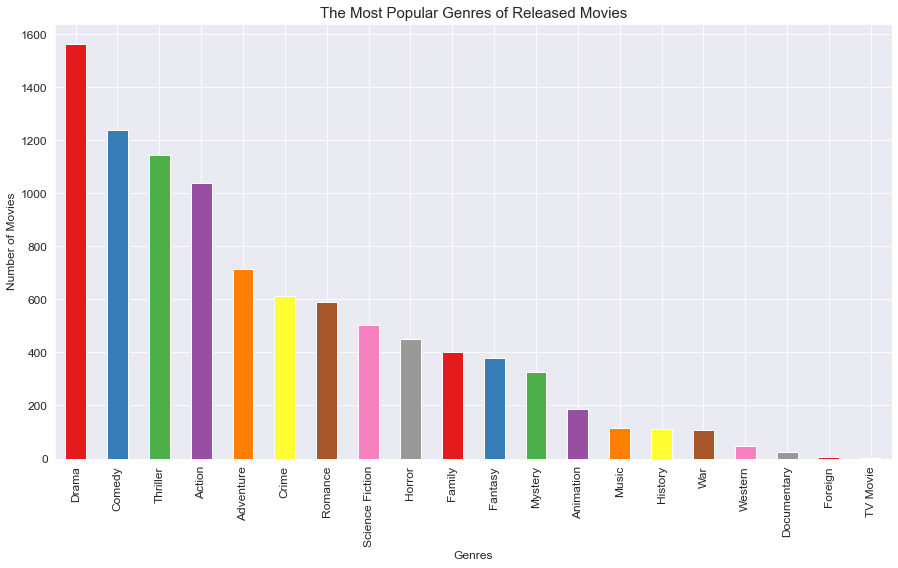

In [24]:
# create a plot diagram which is a bar chart by using plot function for "Number of Movies vs  Genres".
total_genres.plot(kind = 'bar', color = sns.color_palette("Set1"), figsize = (15,8), fontsize = 12)
# setup the title of the plot.
plt.title("The Most Popular Genres of Released Movies",fontsize = 15)
# setup the x and y labels of the plot.
plt.xlabel("Genres",fontsize = 12)
plt.ylabel('Number of Movies',fontsize = 12)

The most popular three genres of released movies. First, it's Drama genre with 1561 number of movies. Second, it's followed by Comedy genre with 1240 number of movies. Then, it's followed by Thriller genre with 1143 number of movies. 

<a id='Q2'></a>
### Research Question 2: Which movie made the highest budget and lowest as well?
<br>

In [25]:
# defining the calculate_high_low() function to find the highest and lowest movie
def calculate_high_low(column):
    # first, find the highest movie
    # use the function 'idmax' to find the index of the highest movie
    highest_index = df[column].idxmax()
    highest_data = pd.DataFrame(df.loc[highest_index])
    
    # second, find the lowest movie
    # use the function 'idmin' to find the index of the lowest movie.
    lowest_index = df[column].idxmin()
    lowest_data = pd.DataFrame(df.loc[lowest_index])
    
    # use concatenation function to combining data
    final_data = pd.concat([highest_data, lowest_data], axis=1)
    
    # view the name of movie with highest and lowest
    print("The movie with the highest " + column + " is : ",df['original_title'][highest_index])
    print("The movie with the lowest " + column + " is : ",df['original_title'][lowest_index])
    
    return final_data

In [26]:
# calling the calculate_high_low() function with parameter name of the budget column
calculate_high_low('budget')

The movie with the highest budget is :  The Warrior's Way
The movie with the lowest budget is :  Lost & Found


,2244,2618
budget,425000000,1
revenue,11087569,100
profit,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100.0,95.0
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
production_companies,Boram Entertainment Inc.,Alcon Entertainment|Dinamo Entertainment


Column with id 2244 shows the highest budget. It's 425 million dollar. <br>
while the column with id 2618 shows the lowest budget. It's 1 dollar

<a id='Q3'></a>
### Research Question 3: Which movie made the highest revenue and lowest as well?
<br>

In [27]:
# calling the calculate_high_low() function again with parameter name of the revenue column
calculate_high_low('revenue')

The movie with the highest revenue is :  Avatar
The movie with the lowest revenue is :  Mallrats


,1386,8142
budget,237000000,6000000
revenue,2781505847,2
profit,2544505847,-5999998
original_title,Avatar,Mallrats
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Lee|Jeremy London|Shannen Doherty|Claire...
director,James Cameron,Kevin Smith
tagline,Enter the World of Pandora.,They're not there to shop. They're not there t...
runtime,162.0,94.0
genres,Action|Adventure|Fantasy|Science Fiction,Romance|Comedy
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Gramercy Pictures|Alphaville Films|View Askew ...


The column with id 1386 shows the highest revenue earned. It's about 2781505847 dollar. <br>
while the column with id 8142 shows the lowest revenue earned. It's 2 dollar

<a id='Q4'></a>
### Research Question 4: Which movie made the highest profit earned and lowest as well?
<br>

In [28]:
# calling the calculate_high_low() function again with parameter name of the profit_earned column
calculate_high_low('profit')

The movie with the highest profit is :  Avatar
The movie with the lowest profit is :  The Warrior's Way


,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
profit,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162.0,100.0
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Boram Entertainment Inc.


The column with id 1386 shows the highest profit earned. It's about 2544505847 dollar. <br>
while the column with id 2244 shows the lowest profit earned. It's -413912431 dollar

<a id='Q5'></a>
### Research Question 5: Which year has the highest average profit?
<br>

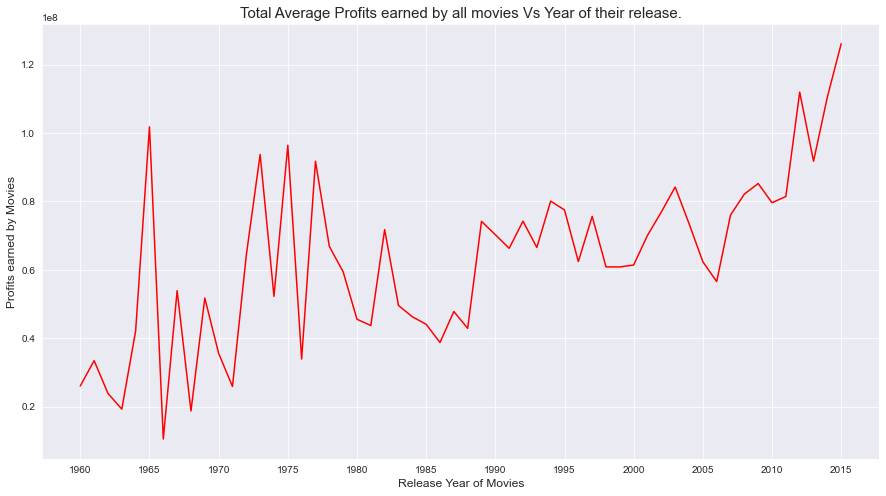

In [29]:
# to find the average profits of movies for every year
# so we have to calculate the mean() profits of all the movies for each particular year
profit_year = df.groupby('release_year')['profit'].mean()

# create a plot diagram which is line plot by using plot function for release year and profit earned
# figure size(width, height)
plt.figure(figsize = (15,8))
# use tick marks function then range function with parameter (min(x),max(x)+1,interval)
plt.xticks(np.arange(1960,2016,5))
# setup title of the line plot
plt.title('Total Average Profits earned by all movies Vs Year of their release.',fontsize = 15 )
# setup x-axis label
plt.xlabel('Release Year of Movies', fontsize = 12)
# setup y-axis lable
plt.ylabel('Profits earned by Movies', fontsize = 12)
#plotting the diagram
plt.plot(profit_year, color = "red" )
# view the line plot
plt.show()

In [30]:
# To locate that which year made the highest average profit
print(profit_year.idxmax())

2015


According to the line plot, we can conclude that year 2015 was the year which movies earned the highest average profits.


<a id='conclusions'></a>
## Conclusions
<br>

In this final section, we will summarize the results we found after analysing TMDb Movie dataset. Which was collected between years 1960 and 2015. We can conclude the following points:

- The most popular four genres of released movies as follows: Drama,  Comedy, Thriller and Action.
- The movie which has the lowest budget is Lost & Found, and it was filmed in 1999.
- The Warrior's Way movie is considered to be the highest budget and filmed in 2010, it amounted to about &dollar;425 million. Also, it is considered the lowest profitable of all in the dataset.
- The most profitable movie is Avatar of all in the dataset. It's filmed in 2009, grossing nearly &dollar;255 million. 
- The movie which has the lowest revenue is Mallrats, and it was filmed in 1995.
- It was the highest average profit earned of all released movies in 2015.

**Limitations:** The dataset provided for analysis is considered uncertain if correct or up-to-date. Also, when we dropped rows with missing values, it may have affected the validity of the general analysis of the dataset. Additionally, It is probable that there is an error in the analysis of the budget and revenue data because it is free from the currency unit. Because, it's possible that the currencies are different based on the country in which it is movie produced. As well, we didn't need many irrelevant fields exist in the data. So, we discarded the others fields.

<hr><hr>
“All that you know, is at an end.” <p style="font-size:12px">DOUG JONES - The Silver Surfer.</p>
<hr><hr>

The End